In [68]:
import numpy as np 
import pandas as pd 
import string
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
import sys
print(sys.executable)

%matplotlib inline
from nltk.corpus import stopwords
!pip install textblob   
import textblob            
from textblob import TextBlob
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
!pip install wordcloud
from matplotlib.pyplot import imread
import sys
print(sys.executable)
import nltk
nltk.download('wordcloud')
%matplotlib inline

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
C:\Users\arvin\anaconda3\python.exe


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arvin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arvin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\arvin\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\arvin\\AppData\\Local\\Temp\\pip-install-2frjgyqa\\wordcloud_14c35b679cbd41f7915a6d68d4bfb7c9\\setup.py'"'"'; __file__='"'"'C:\\Users\\arvin\\AppData\\Local\\Temp\\pip-install-2frjgyqa\\wordcloud_14c35b679cbd41f7915a6d68d4bfb7c9\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\arvin\AppData\Local\Temp\pip-wheel-tr10cxed'
       cwd: C:\Users\arvin\AppData\Local\Temp\pip-install-2frjgyqa\wordcloud_14c35b679cbd41f7915a6d68d4bfb7c9\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9

In [69]:
data=pd.read_csv('C:/Users/arvin/OneDrive/Desktop/Aditi Datascience/Aditi-ASS(DS)/Text Mining/amazon_data.csv')
data=data.iloc[:,0:15]
data.head(10)

,Uniq Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,About Product,Product Specification,Technical Details,Shipping Weight,Product Dimensions
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,NaN,10.7 pounds,NaN
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,The snap circuits mini kits classpack provides...,4 pounds,14.7 x 11.1 x 10.2 inches 4.06 pounds
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,show up to 2 reviews by default No longer are ...,12.8 ounces,NaN
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,Make 8 different Planes at one time. | Experim...,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,Go to your orders and start the return Select ...,13.4 ounces,NaN
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,Make sure this fits by entering your model num...,ProductDimensions:1.9x8x10inches|ItemWeight:13...,show up to 2 reviews by default 100% Officiall...,13.4 ounces,NaN
5,f8c32a45e507a177992973cf0d46d20c,"Terra by Battat – 4 Dinosaur Toys, Medium – Di...",NaN,NaN,NaN,NaN,NaN,$18.66,NaN,AN4054Z,Make sure this fits by entering your model num...,ProductDimensions:8.7x3.9x3.4inches|ItemWeight...,Go to your orders and start the return Select ...,1.4 pounds,NaN
6,40d3cd16b41970ae6872e914aecf2c8e,Rubie's Child's Pokemon Deluxe Pikachu Costume...,NaN,NaN,"Clothing, Shoes & Jewelry | Costumes & Accesso...",NaN,NaN,$29.12,NaN,B07BZJM592,Make sure this fits by entering your model num...,ProductDimensions:16x8x1inches|ItemWeight:1pou...,Go to your orders and start the return Select ...,9.8 ounces,NaN
7,bc178f33a04dbccefa95b165f8b56830,Hoffmaster 120813 Double-Tipped Triangular Cra...,NaN,NaN,Toys & Games | Arts & Crafts | Drawing & Paint...,NaN,NaN,$97.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,cc2083338a16c3fe2f7895289d2e98fe,"ARTSCAPE Etched Glass 24"" x 36"" Window Film, 2...",NaN,NaN,Home & Kitchen | Home Décor | Window Treatment...,NaN,NaN,$12.99,NaN,01-0121,Make sure this fits by entering your model num...,ProductDimensions:72x36x0inches|ItemWeight:11....,show up to 2 reviews by default Product Descri...,12.2 ounces,NaN
9,69828c5570dcdbd1609216d33fbad0db,Pokemon TCG: Sun and Moon Crimson Invasion Eli...,NaN,NaN,NaN,NaN,NaN,$38.49,NaN,820650802607-1,Make sure this fits by entering your model num...,ProductDimensions:7.5x3.5x6.8inches|ItemWeight...,show up to 2 reviews by default Crimson Choas ...,1.5 pounds,NaN


###  Number of words

In [70]:
#Number of Words in single column
data['word_count'] = data['Product Name'].apply(lambda x: len(str(x).split(" ")))
data[['Product Name','word_count']].head()

,Product Name,word_count
0,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",9
1,"Electronic Snap Circuits Mini Kits Classpack, ...",15
2,3Doodler Create Flexy 3D Printing Filament Ref...,17
3,Guillow Airplane Design Studio with Travel Cas...,9
4,Woodstock- Collage 500 pc Puzzle,5


### Number Of Char

In [71]:
#Number of characters in single column including spaces
data['char_count'] = data['Product Name'].str.len() 
data[['Product Name','char_count']].head()

,Product Name,char_count
0,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",72
1,"Electronic Snap Circuits Mini Kits Classpack, ...",93
2,3Doodler Create Flexy 3D Printing Filament Ref...,111
3,Guillow Airplane Design Studio with Travel Cas...,60
4,Woodstock- Collage 500 pc Puzzle,32


### Number of Stopwords

In [72]:
stop = stopwords.words('english')

data['stopwords'] = data['Product Name'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Product Name','stopwords']].head()

,Product Name,stopwords
0,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",0
1,"Electronic Snap Circuits Mini Kits Classpack, ...",1
2,3Doodler Create Flexy 3D Printing Filament Ref...,1
3,Guillow Airplane Design Studio with Travel Cas...,1
4,Woodstock- Collage 500 pc Puzzle,0


In [73]:
# Total no.of stopwords in reviews
data['stopwords'].sum()

5799

## Data Pre-Processing

### Converting to lower case

In [74]:
data['Product Name'] = data['Product Name'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Product Name'].head()

0    db longboards coreflex crossbow 41" bamboo fib...
1    electronic snap circuits mini kits classpack, ...
2    3doodler create flexy 3d printing filament ref...
3    guillow airplane design studio with travel cas...
4                     woodstock- collage 500 pc puzzle
Name: Product Name, dtype: object

### Removing Punctuation and Special Characters

In [75]:
data[''] = data['Product Name'].str.replace('[^\w\s]','')
data['Product Name'].head()

C:\Users\arvin\AppData\Local\Temp/ipykernel_14788/207784569.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data[''] = data['Product Name'].str.replace('[^\w\s]','')


0    db longboards coreflex crossbow 41" bamboo fib...
1    electronic snap circuits mini kits classpack, ...
2    3doodler create flexy 3d printing filament ref...
3    guillow airplane design studio with travel cas...
4                     woodstock- collage 500 pc puzzle
Name: Product Name, dtype: object

### Removing of Stop Words
Stopwords are the English words which does not add much meaning to a sentence.


In [76]:
stop = stopwords.words('english')
data['Product Name'] = data['Product Name'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Product Name'].head()

0    db longboards coreflex crossbow 41" bamboo fib...
1    electronic snap circuits mini kits classpack, ...
2    3doodler create flexy 3d printing filament ref...
3    guillow airplane design studio travel case bui...
4                     woodstock- collage 500 pc puzzle
Name: Product Name, dtype: object

### Tokenization

nltk.download('punkt')-This tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences

In [77]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arvin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
review=np.array(data['Product Name'])
s=str(review)
s

'[\'db longboards coreflex crossbow 41" bamboo fiberglass longboard complete\'\n \'electronic snap circuits mini kits classpack, fm radio, motion detector, music box (set 5)\'\n "3doodler create flexy 3d printing filament refill bundle (x5 pack, 1000\'. extruded plastics! - innovate"\n ...\n \'newpath learning 10 piece science owls owl pellets curriculum mastery flip chart set, grade 5-9\'\n \'disney princess braid set\' \'hasegawa ladders lucano step ladder, orange\']'

We use the word_tokenize() method to split a sentence into tokens or words.

In [79]:
from nltk.tokenize import word_tokenize  
text_tokens = word_tokenize(s)
print(text_tokens)

['[', "'db", 'longboards', 'coreflex', 'crossbow', '41', "''", 'bamboo', 'fiberglass', 'longboard', "complete'", "'electronic", 'snap', 'circuits', 'mini', 'kits', 'classpack', ',', 'fm', 'radio', ',', 'motion', 'detector', ',', 'music', 'box', '(', 'set', '5', ')', "'", '``', '3doodler', 'create', 'flexy', '3d', 'printing', 'filament', 'refill', 'bundle', '(', 'x5', 'pack', ',', '1000', "'", '.', 'extruded', 'plastics', '!', '-', 'innovate', "''", '...', "'newpath", 'learning', '10', 'piece', 'science', 'owls', 'owl', 'pellets', 'curriculum', 'mastery', 'flip', 'chart', 'set', ',', 'grade', "5-9'", "'disney", 'princess', 'braid', 'set', "'", "'hasegawa", 'ladders', 'lucano', 'step', 'ladder', ',', 'orange', "'", ']']


### Stemming
Stemming reduces the word to its word stem means affixes to suffixes and prefixes, or the roots of words known as a lemma.

In [80]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Product Name'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    db longboard coreflex crossbow 41" bamboo fibe...
1    electron snap circuit mini kit classpack, fm r...
2    3doodler creat flexi 3d print filament refil b...
3    guillow airplan design studio travel case buil...
4                       woodstock- collag 500 pc puzzl
Name: Product Name, dtype: object

### Lemmatization

In [81]:
from textblob import Word

In [82]:
data['Product Name'] = data['Product Name'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Product Name'].head()

0    db longboards coreflex crossbow 41" bamboo fib...
1    electronic snap circuit mini kit classpack, fm...
2    3doodler create flexy 3d printing filament ref...
3    guillow airplane design studio travel case bui...
4                     woodstock- collage 500 pc puzzle
Name: Product Name, dtype: object

### Sentiment Analysis

Sentiment Polarity-Sentiment polarity for an element defines the orientation of the expressed sentiment, i.e., it determines if the text expresses the positive, negative or neutral sentiment of the user about the entity in consideration.

In [83]:
data['sentiment_polarity'] = data['Product Name'].apply(lambda x: TextBlob(x).sentiment.polarity )
data[['Product Name','sentiment_polarity']].head()

,Product Name,sentiment_polarity
0,"db longboards coreflex crossbow 41"" bamboo fib...",0.1
1,"electronic snap circuit mini kit classpack, fm...",0.0
2,3doodler create flexy 3d printing filament ref...,0.0
3,guillow airplane design studio travel case bui...,0.0
4,woodstock- collage 500 pc puzzle,0.0


Sentiment

In [84]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
data ['sentiment'] = data  ['sentiment_polarity'].apply(getAnalysis )
data[['Product Name','sentiment','sentiment_polarity']]

,Product Name,sentiment,sentiment_polarity
0,"db longboards coreflex crossbow 41"" bamboo fib...",Positive,0.1
1,"electronic snap circuit mini kit classpack, fm...",Neutral,0.0
2,3doodler create flexy 3d printing filament ref...,Neutral,0.0
3,guillow airplane design studio travel case bui...,Neutral,0.0
4,woodstock- collage 500 pc puzzle,Neutral,0.0
...,...,...,...
9997,remedia publication rem536b money activity boo...,Positive,0.2
9998,trend international nfl la charger hg - mobile...,Neutral,0.0
9999,newpath learning 10 piece science owl owl pell...,Neutral,0.0
10000,disney princess braid set,Neutral,0.0


In [85]:
# No.of Negative,Positive and Neutral Tweets in our given data

In [86]:
count=data['sentiment'].value_counts()
count

Neutral     5150
Positive    3117
Negative    1735
Name: sentiment, dtype: int64

In [87]:
data

,Uniq Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Product Specification,Technical Details,Shipping Weight,Product Dimensions,word_count,char_count,stopwords,,sentiment_polarity,sentiment
0,4c69b61db1fc16e7013b43fc926e502d,"db longboards coreflex crossbow 41"" bamboo fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,...,Shipping Weight: 10.7 pounds (View shipping ra...,NaN,10.7 pounds,NaN,9,72,0,db longboards coreflex crossbow 41 bamboo fibe...,0.1,Positive
1,66d49bbed043f5be260fa9f7fbff5957,"electronic snap circuit mini kit classpack, fm...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,...,Product Dimensions: 14.7 x 11.1 x 10.2...,The snap circuits mini kits classpack provides...,4 pounds,14.7 x 11.1 x 10.2 inches 4.06 pounds,15,93,1,electronic snap circuits mini kits classpack f...,0.0,Neutral
2,2c55cae269aebf53838484b0d7dd931a,3doodler create flexy 3d printing filament ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,show up to 2 reviews by default No longer are ...,12.8 ounces,NaN,17,111,1,3doodler create flexy 3d printing filament ref...,0.0,Neutral
3,18018b6bc416dab347b1b7db79994afa,guillow airplane design studio travel case bui...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,...,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,Go to your orders and start the return Select ...,13.4 ounces,NaN,9,60,1,guillow airplane design studio with travel cas...,0.0,Neutral
4,e04b990e95bf73bbe6a3fa09785d7cd0,woodstock- collage 500 pc puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,...,ProductDimensions:1.9x8x10inches|ItemWeight:13...,show up to 2 reviews by default 100% Officiall...,13.4 ounces,NaN,5,32,0,woodstock collage 500 pc puzzle,0.0,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,1a22f23576bfdfe5ed6c887dc117aab6,remedia publication rem536b money activity boo...,NaN,NaN,Toys & Games | Learning & Education | Counting...,NaN,NaN,$9.31,NaN,REM536B,...,Product Dimensions: 11 x 8.5 x 0.4 inc...,show up to 2 reviews by default Activities inc...,4.8 ounces,11 x 8.5 x 0.4 inches 1.6 ounces,16,99,1,remedia publications rem536b money activity bo...,0.2,Positive
9998,e11514dcf1f087887cd5ea0bd646d1fc,trend international nfl la charger hg - mobile...,NaN,NaN,Toys & Games | Arts & Crafts,NaN,NaN,$6.99,NaN,NaN,...,ProductDimensions:3x6.5x0.3inches|ItemWeight:0...,The mobile wallet is made of silicone with str...,0.96 ounces,NaN,9,55,0,trends international nfl la chargers hg mobil...,0.0,Neutral
9999,c00301a38560da2abc89c1f86ce4b267,newpath learning 10 piece science owl owl pell...,NaN,NaN,Office Products | Office & School Supplies | E...,NaN,NaN,$37.95,NaN,34-6015,...,Product Dimensions: 18 x 11.9 x 0.7 in...,show up to 2 reviews by default NewPath Learni...,2.8 pounds,18 x 11.9 x 0.7 inches 2.75 pounds,16,99,1,newpath learning 10 piece science owls and owl...,0.0,Neutral
10000,c2928dbf9796ceba44863a2736afb405,disney princess braid set,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$3.58,NaN,2888PRST,...,ProductDimensions:7x7x2inches|ItemWeight:6.1ou...,Disney Princess DIY Braid Set | 6.1 ounces (Vi...,6.1 ounces,NaN,7,40,0,disney princess do it yourself braid set,0.0,Neutral


### Visualizations

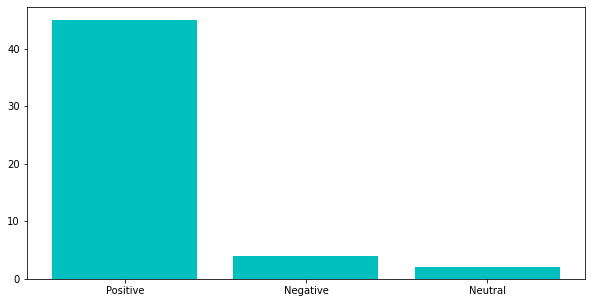

In [88]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,5))
count=[45,4,2]
senti=['Positive','Negative','Neutral']
plt.bar(senti,count,color='c');

In [89]:
# Joining the list into one string/text
text = ' '.join(data['Product Name'])
text

'db longboards coreflex crossbow 41" bamboo fiberglass longboard complete electronic snap circuit mini kit classpack, fm radio, motion detector, music box (set 5) 3doodler create flexy 3d printing filament refill bundle (x5 pack, 1000\'. extruded plastics! - innovate guillow airplane design studio travel case building kit woodstock- collage 500 pc puzzle terra battat – 4 dinosaur toys, medium – dinosaur kid & collectors, scientifically accurate & designed paleo-artist; age 3+ (4 pc) rubie\'s child\'s pokemon deluxe pikachu costume, x-small hoffmaster 120813 double-tipped triangular crayon, 88 mm length, wrapped (500 pack 2) artscape etched glass 24" x 36" window film, 24-by-36-inch pokemon tcg: sun moon crimson invasion elite trainer box moonlite, 3-story bundle boys, includes 3 story reel use storybook projector dc cover girls: black canary joëlle jones statue baby doll bedding chevron window valance curtain set, orange lego minecraft creeper bigfig ocelot character 21156 buildable to